In [61]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [95]:
theta,t,alpha,n,omega,N = sp.symbols('theta t alpha n omega N')
K,alpha,beta = sp.symbols('K alpha beta',real=True)
r = sp.IndexedBase('r', real = True)
eps = sp.IndexedBase('eps', real = True)
phi = sp.IndexedBase('phi', real = True)
Z = sp.symbols('Z')
R1 = (r[1,1]-r[1,2])/2
R2 = (r[2,1]-r[2,2])/2


dr11_dt = K/2 *(R1**2 *sp.cos(alpha)+beta**2*R2**2*sp.cos(alpha+2*phi) + 2*beta*R1*R2*sp.cos(alpha+phi)-sp.cos(alpha)/(2*N)*(r[1,1]**2+r[1,2]**2)-beta**2*sp.cos(alpha+2*phi)/(2*N)*(r[2,1]**2+r[2,2]**2))*(r[1,1]-r[1,1]**3)-K/(2*N)*(R1*sp.cos(alpha)+beta*R2*sp.cos(alpha+phi))*(1-r[1,1]**2)
dr12_dt = K/2 *(R1**2 *sp.cos(alpha)+beta**2*R2**2*sp.cos(alpha+2*phi) + 2*beta*R1*R2*sp.cos(alpha+phi)-sp.cos(alpha)/(2*N)*(r[1,1]**2+r[1,2]**2)-beta**2*sp.cos(alpha+2*phi)/(2*N)*(r[2,1]**2+r[2,2]**2))*(r[1,2]-r[1,2]**3)-K/(2*N)*(R1*sp.cos(alpha)+beta*R2*sp.cos(alpha+phi))*(1-r[1,2]**2)
dr21_dt = K/2 *(R2**2 *sp.cos(alpha)+beta**2*R1**2*sp.cos(alpha-2*phi) + 2*beta*R2*R1*sp.cos(alpha-phi)-sp.cos(alpha)/(2*N)*(r[2,1]**2+r[2,2]**2)-beta**2*sp.cos(alpha-2*phi)/(2*N)*(r[1,1]**2+r[1,2]**2))*(r[2,1]-r[2,1]**3)-K/(2*N)*(R2*sp.cos(alpha)+beta*R1*sp.cos(alpha-phi))*(1-r[2,1]**2)
dr22_dt = K/2 *(R2**2 *sp.cos(alpha)+beta**2*R1**2*sp.cos(alpha-2*phi) + 2*beta*R2*R1*sp.cos(alpha-phi)-sp.cos(alpha)/(2*N)*(r[2,1]**2+r[2,2]**2)-beta**2*sp.cos(alpha-2*phi)/(2*N)*(r[1,1]**2+r[1,2]**2))*(r[2,2]-r[2,2]**3)-K/(2*N)*(R2*sp.cos(alpha)+beta*R1*sp.cos(alpha-phi))*(1-r[2,2]**2)

dpsi1_dt = omega-sp.sin(alpha)/N**2 - K/2*(R1**2*sp.sin(alpha)+beta**2*R2**2*sp.sin(alpha+2*phi)-1/N*(r[1,1]**2+r[1,2]**2)*sp.sin(alpha)-beta**2/N*(r[2,1]**2+r[2,2]**2)*sp.sin(alpha+2*phi))*(1+r[1,1]**2) - K/(2*N*r[1,1])*(R1*sp.sin(alpha)+beta*R2*sp.sin(alpha+phi))*(1+r[1,1])
dpsi2_dt = omega-sp.sin(alpha)/N**2 + K/2*(R2**2*sp.sin(alpha)+beta**2*R1**2*sp.sin(alpha-2*phi)-1/N*(r[2,1]**2+r[2,2]**2)*sp.sin(alpha)-beta**2/N*(r[1,1]**2+r[1,2]**2)*sp.sin(alpha-2*phi))*(1+r[2,1]**2) + K/(2*N*r[2,1])*(R2*sp.sin(alpha)+beta*R1*sp.sin(alpha-phi))*(1+r[2,1])
dphi_dt = dpsi1_dt - dpsi2_dt


In [96]:
dR_dt = dr21_dt.subs([(r[1,2],1),(r[1,1],1),(r[2,2],r[2,1])])
sol_r = sp.solve(dR_dt,r[2,1])[4]
sol_r

beta*sqrt(-cos(alpha - 2*phi)/cos(alpha))

In [97]:
dR_dt

K*(-beta**2*cos(alpha - 2*phi)/N - cos(alpha)*r[2, 1]**2/N)*(-r[2, 1]**3 + r[2, 1])/2

In [98]:
SUB_dphi = dphi_dt.subs([(r[1,2],1),(r[1,1],1),(r[2,2],r[2,1])])
SUB_dphi.collect(r[2,1])

-K*(-2*beta**2*sin(alpha - 2*phi)/N - 2*sin(alpha)*r[2, 1]**2/N)*(r[2, 1]**2 + 1)/2 - K*(-2*beta**2*sin(alpha + 2*phi)*r[2, 1]**2/N - 2*sin(alpha)/N)

In [99]:
dR_dt.simplify()

K*(beta**2*cos(alpha - 2*phi) + cos(alpha)*r[2, 1]**2)*(r[2, 1]**2 - 1)*r[2, 1]/(2*N)

In [100]:
sub_Z = dphi_dt.subs([(r[1,2],1),(r[1,1],1),(r[2,2],r[2,1])]).subs(r[2,1],Z).simplify()
dphi_r = sub_Z.subs(Z,sol_r)

In [101]:
sub_Zn,sub_Zd = sp.fraction(sub_Z)

In [102]:
n,d = sp.fraction(dphi_r.simplify())

In [103]:
print(n.simplify())

K*(-2*beta**4*sin(alpha + 2*phi)*cos(alpha)*cos(alpha - 2*phi) + beta**2*(beta**2*cos(alpha - 2*phi) - cos(alpha))*sin(2*phi) + 2*sin(alpha)*cos(alpha)**2)


In [104]:
def dphi_0(phi,alpha,beta):
    Z2 = beta**2 * (-np.cos(alpha - 2*phi)/np.cos(alpha))
    phi_0 = (2*Z2*beta**2*np.sin(alpha + 2*phi) - (Z2 + 1)*(Z2*np.sin(alpha) + beta**2*np.sin(alpha - 2*phi)) + 2*np.sin(alpha))    
    return phi_0

In [105]:
# def dphi_0(phi,alpha,beta):
#     Z2 = beta**2 * (-np.cos(alpha - 2*phi)/np.cos(alpha))
#     phi_0 = -(2*np.sin(alpha)+2*beta**2*Z2) + (beta**2*(1+Z2)*np.sin(alpha-2*phi)+Z2*(1+Z2)*np.sin(alpha))   
#     return phi_0

def get_R(phi,alpha,beta):
    R = beta*np.sqrt(-np.cos(alpha - 2*phi)/np.cos(alpha))
    return R

def get_R2(phi,alpha,beta):
    R2 = beta**2 * (-np.cos(alpha - 2*phi)/np.cos(alpha))
    return R2

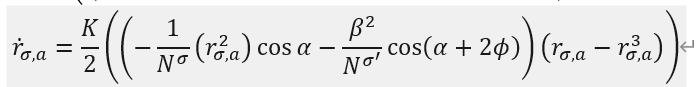

In [108]:
Beta = 0.3
Alpha = 0.8

In [109]:
initial_guesses = np.linspace(-np.pi,np.pi, 10)
solutions = set()
for guess in initial_guesses:
    solution = fsolve(dphi_0, guess,args=(Alpha,Beta))
    # if np.isclose(dphi_0(solution,Alpha,Beta), 0):
    if (solution<=np.pi) and (solution>0):
        solutions.add(round(solution[0], 7))  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


In [110]:
solutions, get_R2(solution,Alpha,Beta)

({2.2522345}, array([0.10971335]))

In [111]:
get_R2(np.array(list(solutions)),Alpha,Beta)

array([0.1092499])

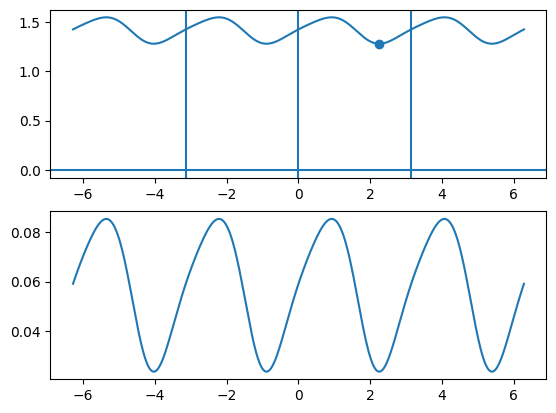

In [112]:
xs = np.linspace(-2*np.pi,2*np.pi, 10000)
Phi = dphi_0(xs,Alpha,Beta)
plt.subplot(211)
plt.plot(xs,Phi)
for sol in solutions:
    plt.scatter(sol,dphi_0(sol,Alpha,Beta))
plt.axhline()
plt.axvline(np.pi)
plt.axvline(-np.pi)
plt.axvline(0)

plt.subplot(212)
plt.plot(xs,get_R2(Phi,Alpha,Beta))




In [14]:
from mpmath import findroot

In [15]:
Alphas = np.linspace(0,np.pi/2,20)[1:]
Betas = np.linspace(0,1,20)[1:]

AA,BB = np.meshgrid(Alphas,Betas)
LENS = np.nan*np.ones_like(AA)

In [16]:
LENS[0].shape

(19,)

In [23]:

initial_guesses = np.linspace(-np.pi,np.pi, 100)  # 초기 추정값들의 배열


Alpha = 0.0
Beta = 0.8
Alphas = np.linspace(0,np.pi/2,50)[:]
Betas = np.linspace(0,1,50)[1:]

AA,BB = np.meshgrid(Alphas,Betas)
Qs_dict = {}
Rs_dict = {}
Ps_dict = {}
Len_dict = {}

for Alpha in Alphas:
    for Beta in Betas:
        solutions = set()
        for guess in initial_guesses:
            solution = fsolve(dphi_0, guess,args=(Alpha,Beta))
            if np.isclose(dphi_0(solution,Alpha,Beta), 0):
                if (solution<=np.pi) and (solution>0):
                    solutions.add(round(solution[0], 7))  
            
        Rs = []
        Qs = []
        phis = []

        for psi in solutions:
            R2 = get_R2(psi,Alpha,Beta)
            if (R2>0)and(R2<=1):
                R = get_R(psi,Alpha,Beta)
                Rs.append(R)
                Qs.append(R2)
                phis.append(psi)
        Rs_dict[Alpha,Beta],Qs_dict[Alpha,Beta],Ps_dict[Alpha,Beta]  = map(np.array,[Rs,Qs,phis])

In [24]:
KA = []
KB = []
MAX_Q,MIN_Q,Lens = [],[],[]
Mean_Q = []
Std_Q = []
for (k_alpha,k_beta),Qs in Qs_dict.items():
    if Qs.shape[0]>0:
        KA.append(k_alpha)
        KB.append(k_beta)
        if Qs.shape[0]>1:
            MAX_Q.append(np.max(Qs))
            MIN_Q.append(np.min(Qs))
        else:
            MAX_Q.append(np.max(Qs))
            MIN_Q.append(np.nan)
        Mean_Q.append(np.mean(Qs))
        Std_Q.append(np.std(Qs))
        Lens.append(Qs.shape[0])
    else:
        # print(k_alpha,k_beta)
        KA.append(k_alpha)
        KB.append(k_beta)
        MAX_Q.append(np.nan)
        MIN_Q.append(np.nan)
        Mean_Q.append(np.nan)
        Std_Q.append(np.nan)
        Lens.append(np.nan) 
MAX_Q,MIN_Q,Mean_Q,Std_Q,Lens = map(np.array,[MAX_Q,MIN_Q,Mean_Q,Std_Q,Lens])     


In [25]:
HQ = MAX_Q.reshape(len(Alphas),-1).T
LQ = MIN_Q.reshape(len(Alphas),-1).T

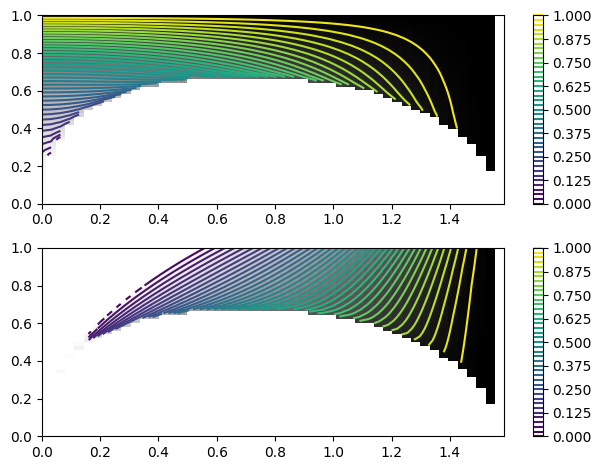

In [32]:
# plt.imshow(MAX_Q.reshape(AA.shape))
# plt.imshow(MIN_Q.reshape(AA.shape))
# plt.pcolormesh(AA,BB,Lens.reshape(len(Betas),len(Alphas)))
# plt.pcolormesh(AA,BB,MAX_Q.reshape(AA.shape))
plt.subplot(211)
plt.pcolormesh(AA,BB,HQ,vmin=0,vmax=1,cmap='gray_r')

plt.contour(AA,BB,HQ,levels=41)
# plt.contour(AA,BB,LQ,levels=41)
plt.xlim(0,)
plt.ylim(0,1)
plt.colorbar()

plt.subplot(212)
plt.pcolormesh(AA,BB,LQ,vmin=0,vmax=1,cmap='gray_r')
plt.contour(AA,BB,LQ,levels=41)
plt.xlim(0,)
plt.ylim(0,1)
plt.colorbar()

# plt.subplot(313)
# plt.pcolormesh(AA,BB,HQ-LQ)
# plt.colorbar()

plt.tight_layout()

# plt.pcolormesh(AA,BB,Std_Q.reshape(AA.shape))

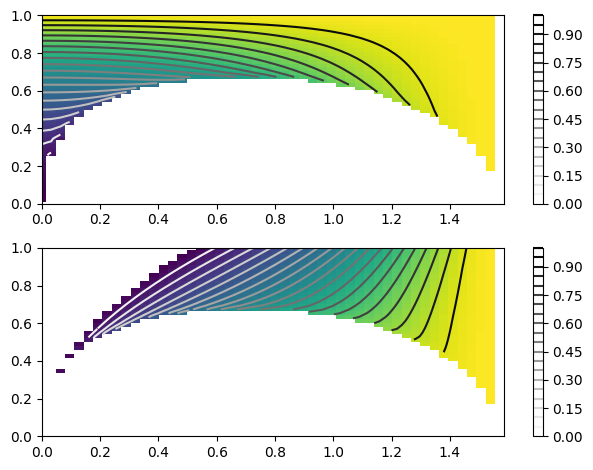

In [37]:
# plt.imshow(MAX_Q.reshape(AA.shape))
# plt.imshow(MIN_Q.reshape(AA.shape))
# plt.pcolormesh(AA,BB,Lens.reshape(len(Betas),len(Alphas)))
# plt.pcolormesh(AA,BB,MAX_Q.reshape(AA.shape))
plt.subplot(211)
plt.pcolormesh(AA,BB,HQ,vmin=0,vmax=1)
plt.contour(AA,BB,HQ,levels=21,cmap='gray_r')
# plt.contour(AA,BB,LQ,levels=41)
plt.xlim(0,)
plt.ylim(0,1)
plt.colorbar()

plt.subplot(212)
plt.pcolormesh(AA,BB,LQ,vmin=0,vmax=1)
plt.contour(AA,BB,LQ,levels=21,cmap='gray_r')
plt.xlim(0,)
plt.ylim(0,1)
plt.colorbar()

# plt.subplot(313)
# plt.pcolormesh(AA,BB,HQ-LQ)
# plt.colorbar()

plt.tight_layout()

# plt.pcolormesh(AA,BB,Std_Q.reshape(AA.shape))

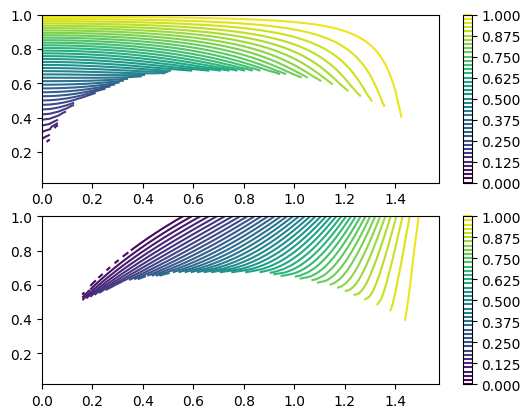

In [27]:
plt.subplot(211)
plt.contour(AA,BB,HQ,levels=41)
plt.colorbar()

plt.subplot(212)
plt.contour(AA,BB,LQ,levels=41)
plt.colorbar()

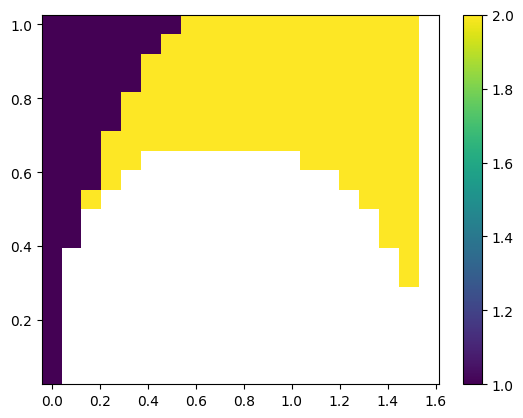

In [325]:
plt.pcolormesh(AA,BB,Lens.reshape(20,-1).T)
plt.colorbar()

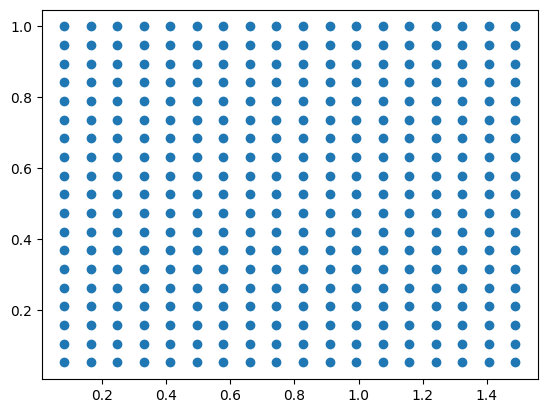

In [153]:
plt.scatter(KA,KB)

In [58]:
Ns = np.linspace(1,1000,1000)
t_c = np.arcsin(1/Ns)


[]

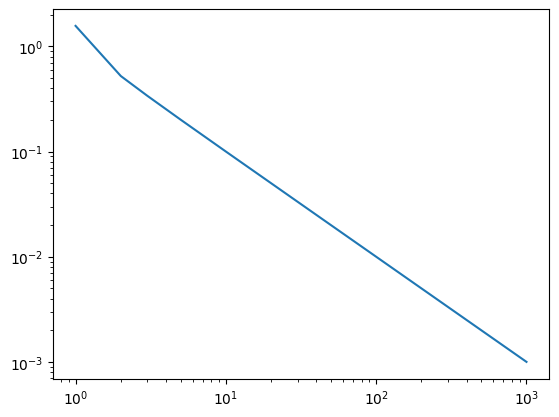

In [60]:
plt.plot(Ns,t_c)
plt.loglog()


# check_simulation

In [62]:
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n,len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y


In [72]:
def df_dt(Z,t,alpha,beta,K,N):
    r,phi = Z
    dr = -K/N*(r**2*np.cos(alpha) - beta**2*np.cos(alpha+2*phi))*(r-r**3)
    dphi = K/N*(2*np.sin(alpha)+2*beta*r**2*np.sin(alpha+2*phi)+(1+r**2)*(beta**2*np.sin(alpha-2*phi) + r**2*np.sin(alpha)))
    return np.array([dr,dphi])

In [79]:
u0 = np.array([0.3,0.8])

In [90]:
beta = 0.4
alpha = 0.2
K = 1
N = 50

In [91]:
p = np.pi
-beta**2 * np.cos(alpha+2*p)/np.cos(alpha)

-0.16000000000000003

In [92]:
t = np.linspace(0,10000,30000)
u = RK4(df_dt,u0.flatten(),t,args=(alpha,beta,K,N))

In [93]:
Rs,Phis = u.T

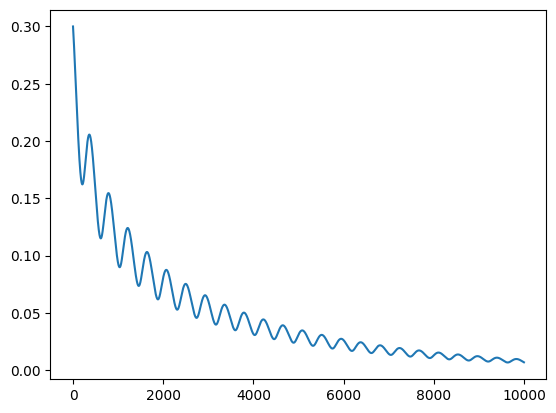

In [94]:
plt.plot(t,Rs)
# plt.plot(t,Phis)